In [248]:
from misc import FrozenLakeEnv, make_grader
env = FrozenLakeEnv(map_name='8x8', is_slippery=False)
import matplotlib.gridspec as gridspec
import matplotlib.colors as mcolors

In [249]:
import numpy as np, numpy.random as nr, gym
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=3)

# Seed RNGs so you get the same printouts as me
env.seed(0); from gym.spaces import prng; prng.seed(10)
# Generate the episode
env.reset()
for t in range(100):
    env.render()
    a = env.action_space.sample()
    ob, rew, done, _ = env.step(a)
    if done:
        break
assert done
env.render();


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Left)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFF

In [250]:
import time

class MDP(object):
    def __init__(self, P, nS, nA, desc=None):
        self.P = P # state transition and reward probabilities, explained below
        self.nS = nS # number of states
        self.nA = nA # number of actions
        self.desc = desc # 2D array specifying what each grid cell means (used for plotting)
        
def value_iteration(mdp, gamma, nIt, grade_print=print):
    """
    Inputs:
        mdp: MDP
        gamma: discount factor
        nIt: number of iterations, corresponding to n above
    Outputs:
        (value_functions, policies)
        
    len(value_functions) == nIt+1 and len(policies) == nIt
    """
    grade_print("Iteration | max|V-Vprev| | # chg actions | V[0]")
    grade_print("----------+--------------+---------------+---------")
    Vs = [np.zeros(mdp.nS)] # list of value functions contains the initial value function V^{(0)}, which is zero
    pis = []
    
    latex_array = np.zeros((nIt, 4)) # a 4 x nIt array for each display value
    start = time.time()
    for it in range(nIt):
        oldpi = pis[-1] if len(pis) > 0 else None # \pi^{(it)} = Greedy[V^{(it-1)}]. Just used for printout
        Vprev = Vs[-1] # V^{(it)}
        
        # Your code should fill in meaningful values for the following two variables
        # pi: greedy policy for Vprev (not V), 
        #     corresponding to the math above: \pi^{(it)} = Greedy[V^{(it)}]
        #     ** it needs to be numpy array of ints **
        # V: bellman backup on Vprev
        #     corresponding to the math above: V^{(it+1)} = T[V^{(it)}]
        #     ** numpy array of floats **
        
        V = np.zeros(mdp.nS)
        pi = np.zeros(mdp.nS)
        # for each state in the set of states
        for state in mdp.P:
            maxv = 0
            # loop through all the actions in the state
            for action in mdp.P[state]:
                v = 0
                for probability, nextstate, reward in mdp.P[state][action]:
                    v += probability * (reward + gamma * Vprev[nextstate])
                # if this the largest value for this state, update 
                if v > maxv:
                    maxv = v
                    # greedy policy
                    pi[state] = action
            # note above, avoid updating value function in place
            V[state] = maxv

        max_diff = np.abs(V - Vprev).max()
        nChgActions=-1 if oldpi is None else (pi != oldpi).sum()
        latex_array[it][0] = (it)
        latex_array[it][1] = (round(max_diff, 3))
        latex_array[it][2] = (nChgActions)
        latex_array[it][3] = (round(V[0], 3))
        
        grade_print("%4i      | %6.5f      | %4s          | %5.3f"%(it, max_diff, nChgActions, V[0]))
        Vs.append(V)
        pis.append(pi)
    end = time.time()
    print(end - start, 'seconds')
    print(" \\\\\n".join([" & ".join(map(str,line)) for line in latex_array]))
    return Vs, pis

# HG use unwrapped to access 
mdp = MDP( {s : {a : [tup[:3] for tup in tups] for (a, tups) in a2d.items()} for (s, a2d) in env.unwrapped.P.items()}, env.unwrapped.nS, env.unwrapped.nA, env.unwrapped.desc)
GAMMA = 0.99 # we'll be using this same value in subsequent problems
Vs_VI, pis_VI = value_iteration(mdp, gamma=GAMMA, nIt=100)

Iteration | max|V-Vprev| | # chg actions | V[0]
----------+--------------+---------------+---------
   0      | 1.00000      |   -1          | 0.000
   1      | 0.99000      |    2          | 0.000
   2      | 0.98010      |    3          | 0.000
   3      | 0.97030      |    3          | 0.000
   4      | 0.96060      |    4          | 0.000
   5      | 0.95099      |    4          | 0.000
   6      | 0.94148      |    5          | 0.000
   7      | 0.93207      |    5          | 0.000
   8      | 0.92274      |    4          | 0.000
   9      | 0.91352      |    6          | 0.000
  10      | 0.90438      |    6          | 0.000
  11      | 0.89534      |    5          | 0.000
  12      | 0.88638      |    3          | 0.000
  13      | 0.87752      |    1          | 0.878
  14      | 0.00000      |    0          | 0.878
  15      | 0.00000      |    0          | 0.878
  16      | 0.00000      |    0          | 0.878
  17      | 0.00000      |    0          | 0.878
  18      | 0.0000

/Users/jonathanbe/anaconda3/envs/deeprlbootcamp/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


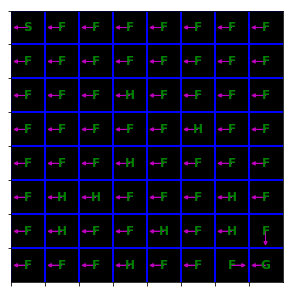

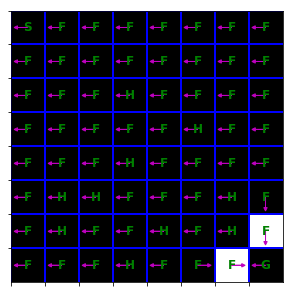

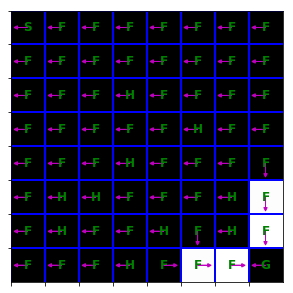

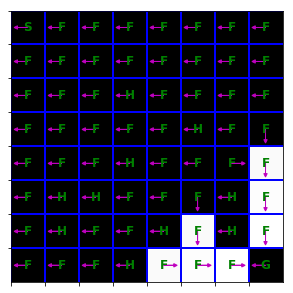

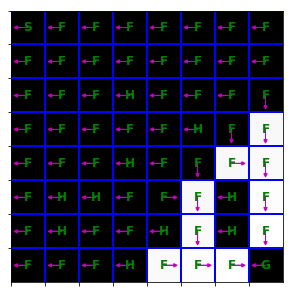

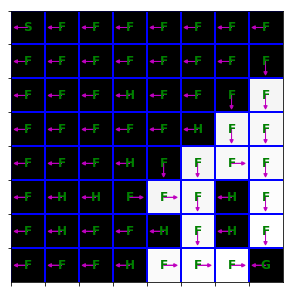

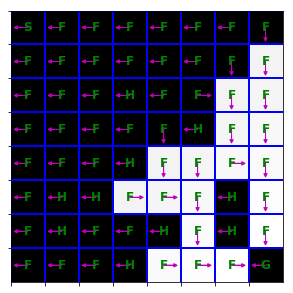

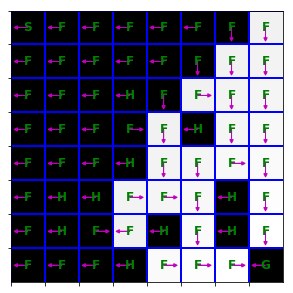

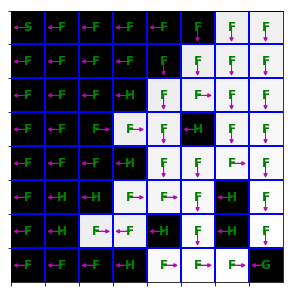

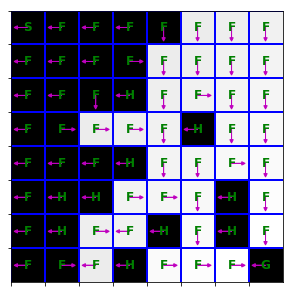

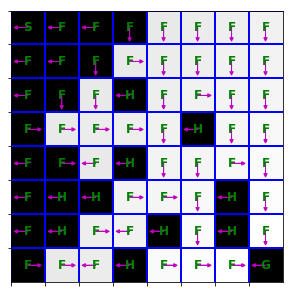

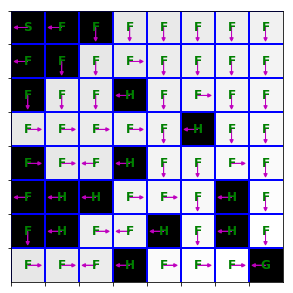

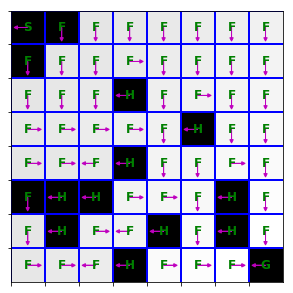

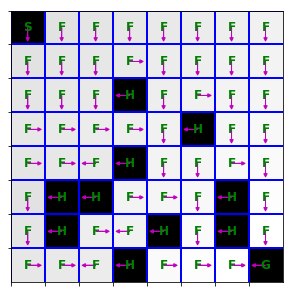

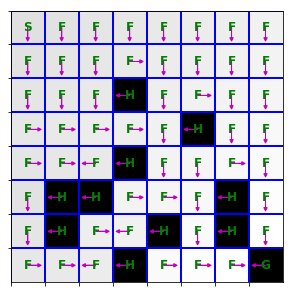

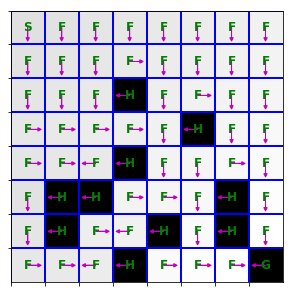

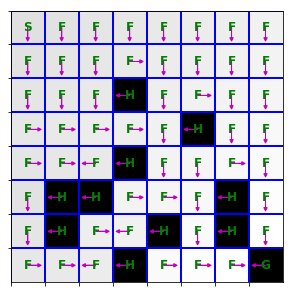

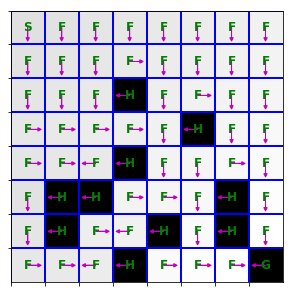

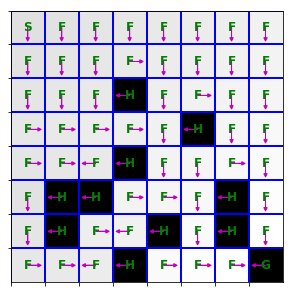

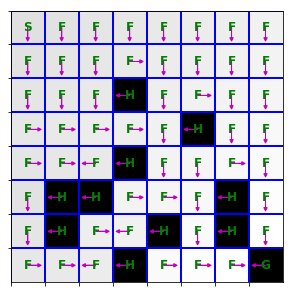

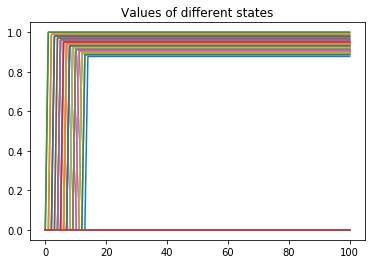

In [251]:
for (V, pi) in zip(Vs_VI[:10], pis_VI[:20]):
    plt.figure(figsize=(5,5))
    plt.imshow(V.reshape(8,8), cmap='gray', interpolation='none', clim=(0,1))
    ax = plt.gca()
    ax.set_xticks(np.arange(8)-.5)
    ax.set_yticks(np.arange(8)-.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    
#     img = plt.imshow(np.array([[0,1]]), cmap="gray")
#     img.set_visible(False)

#     plt.colorbar(orientation="vertical")

#     ax.plot(2,2)
        
    
    Y, X = np.mgrid[0:8, 0:8]
    a2uv = {0: (-1, 0), 1:(0, -1), 2:(1,0), 3:(-1, 0)}
    Pi = pi.reshape(8,8)
    for y in range(8):
        for x in range(8):
            a = Pi[y, x]
            u, v = a2uv[a]
            plt.arrow(x, y,u*.3, -v*.3, color='m', head_width=0.1, head_length=0.1) 
            plt.text(x, y, str(env.unwrapped.desc[y,x].item().decode()),
                     color='g', size=12,  verticalalignment='center',
                     horizontalalignment='center', fontweight='bold')
    plt.grid(color='b', lw=2, ls='-')
plt.figure()
plt.plot(Vs_VI)
plt.title("Values of different states");

In [ ]:
direct = {
    1: 'DOWN',
    2: 'RIGHT',
    0: 'LEFT',
    3: 'UP'
}

for y in range(4):
        for x in range(4):
            a = Pi[y, x]
            print(direct[a], y, x)
np.set_printoptions(precision=3)
print(pis_VI[19].reshape(4,4))
print(Vs_VI[19].reshape(4,4)[3][2])

In [252]:
def compute_vpi(pi, mdp, gamma):
    # use pi[state] to access the action that's prescribed by this policy
    a = np.identity(mdp.nS) 
    b = np.zeros(mdp.nS) 
    for state in range(mdp.nS):
        for probability, nextstate, reward in mdp.P[state][pi[state]]:
            a[state][nextstate] = a[state][nextstate] - gamma * probability
            b[state] += probability * reward
    
    V = np.linalg.solve(a, b)
    return V


def compute_qpi(vpi, mdp, gamma):
    Qpi = np.zeros([mdp.nS, mdp.nA]) # REPLACE THIS LINE WITH YOUR CODE
    for state in range(mdp.nS):
        for action in range(mdp.nA):
            for probability, nextstate, reward in mdp.P[state][action]:
                Qpi[state][action] += probability * (reward + gamma * vpi[nextstate]) 
    return Qpi

actual_val = compute_vpi(np.arange(64) % mdp.nA, mdp, gamma=GAMMA)
Qpi = compute_qpi(np.arange(mdp.nS), mdp, gamma=0.99)

print("Actual: ", actual_val)
print("Actual: ", Qpi)

Actual:  [ 0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0. -0.  0.  0.  0. -0.  0.  0.
  0. -0. -0.  0.  0. -0.  0.  0.  0. -0.  0.  0.  0. -0.  0.  0.  0. -0.
 -0.  0.  0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0. -0.  0.  0.  1.  0.]
Actual:  [[  0.     7.92   0.99   0.  ]
 [  0.     8.91   1.98   0.99]
 [  0.99   9.9    2.97   1.98]
 [  1.98  10.89   3.96   2.97]
 [  2.97  11.88   4.95   3.96]
 [  3.96  12.87   5.94   4.95]
 [  4.95  13.86   6.93   5.94]
 [  5.94  14.85   6.93   6.93]
 [  7.92  15.84   8.91   0.  ]
 [  7.92  16.83   9.9    0.99]
 [  8.91  17.82  10.89   1.98]
 [  9.9   18.81  11.88   2.97]
 [ 10.89  19.8   12.87   3.96]
 [ 11.88  20.79  13.86   4.95]
 [ 12.87  21.78  14.85   5.94]
 [ 13.86  22.77  14.85   6.93]
 [ 15.84  23.76  16.83   7.92]
 [ 15.84  24.75  17.82   8.91]
 [ 16.83  25.74  18.81   9.9 ]
 [ 18.81  18.81  18.81  18.81]
 [ 18.81  27.72  20.79  11.88]
 [ 19.8   28.71  21.78  12.87]
 [ 20.79  29.7   22.77  13.86]
 [ 21.78

Iteration | # chg actions | V[0]
----------+---------------+---------
   0      |      2        | -0.00000
   1      |      2        | -0.00000
   2      |      3        | -0.00000
   3      |      3        | -0.00000
   4      |      4        | -0.00000
   5      |      4        | -0.00000
   6      |      5        | -0.00000
   7      |      5        | -0.00000
   8      |      4        | -0.00000
   9      |      6        | -0.00000
  10      |      6        | -0.00000
  11      |      5        | -0.00000
  12      |      3        | -0.00000
  13      |      1        | 0.00000
  14      |      0        | 0.87752
  15      |      0        | 0.87752
  16      |      0        | 0.87752
  17      |      0        | 0.87752
  18      |      0        | 0.87752
  19      |      0        | 0.87752
0.01819014549255371 seconds
0.0 & 2.0 & -0.0 \\
1.0 & 2.0 & -0.0 \\
2.0 & 3.0 & -0.0 \\
3.0 & 3.0 & -0.0 \\
4.0 & 4.0 & -0.0 \\
5.0 & 4.0 & -0.0 \\
6.0 & 5.0 & -0.0 \\
7.0 & 5.0 & -0.0 \\
8.0 & 4.0

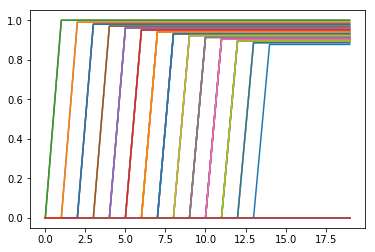

In [255]:
def policy_iteration(mdp, gamma, nIt, grade_print=print):
    Vs = []
    pis = []
    pi_prev = np.zeros(mdp.nS,dtype='int')
    pis.append(pi_prev)
    latex_array = np.zeros((nIt, 3))
    grade_print("Iteration | # chg actions | V[0]")
    grade_print("----------+---------------+---------")
    start = time.time()
    for it in range(nIt):        
        # YOUR CODE HERE
        # you need to compute qpi which is the state-action values for current pi
        vpi = compute_vpi(pis[-1], mdp, gamma=gamma)
        qpi = compute_qpi(vpi, mdp, gamma=gamma)
        pi = qpi.argmax(axis=1)
        grade_print("%4i      | %6i        | %6.5f"%(it, (pi != pi_prev).sum(), vpi[0]))
        latex_array[it][0] = it
        latex_array[it][1] = (pi != pi_prev).sum()
        latex_array[it][2] = vpi[0]
        Vs.append(vpi)
        pis.append(pi)
        pi_prev = pi
    end = time.time()
    print(end - start, 'seconds')
    print(" \\\\\n".join([" & ".join(map(str,line)) for line in latex_array]))
    return Vs, pis
Vs_PI, pis_PI = policy_iteration(mdp, gamma=0.99, nIt=20)
plt.plot(Vs_PI);

/Users/jonathanbe/anaconda3/envs/deeprlbootcamp/lib/python3.5/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


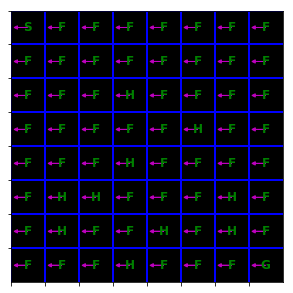

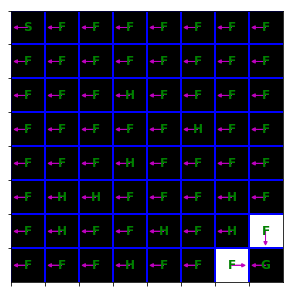

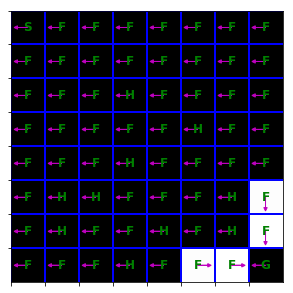

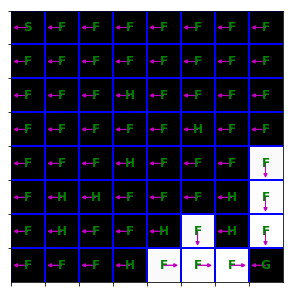

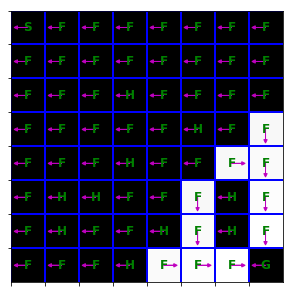

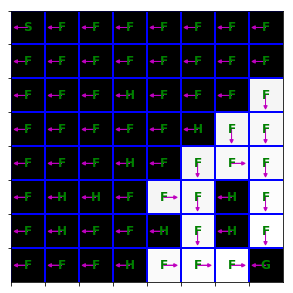

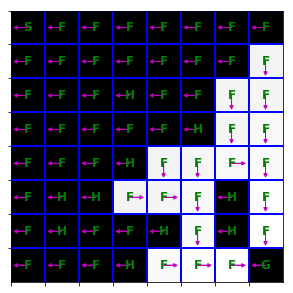

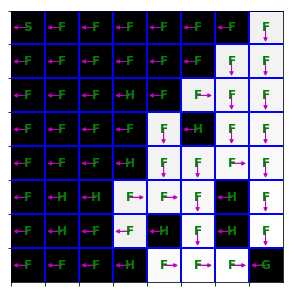

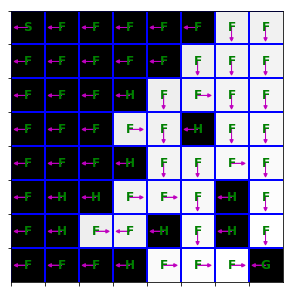

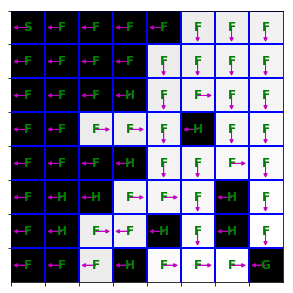

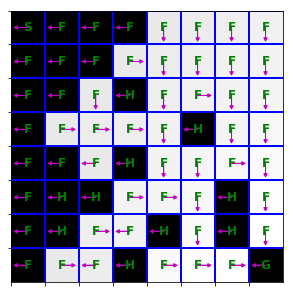

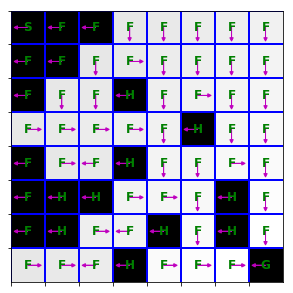

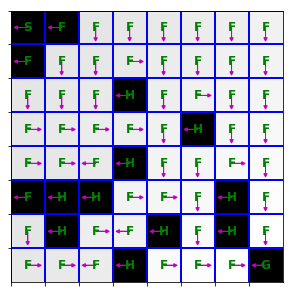

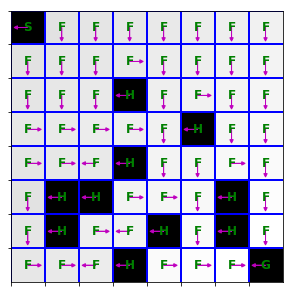

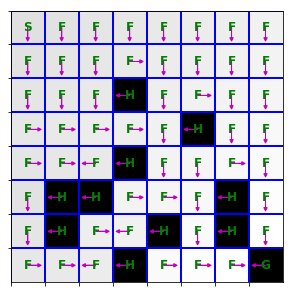

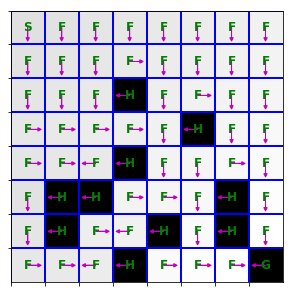

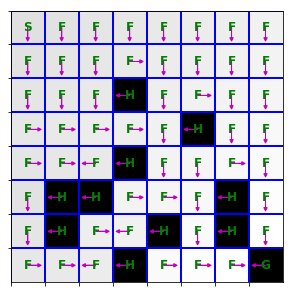

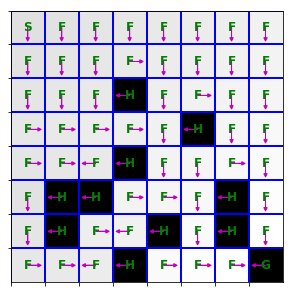

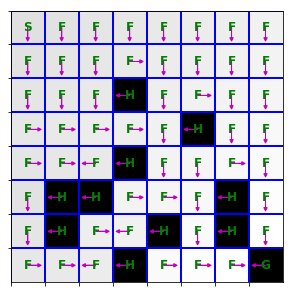

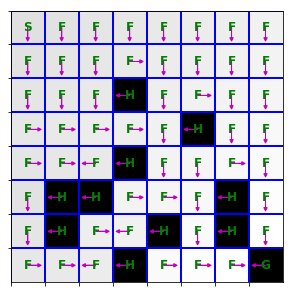

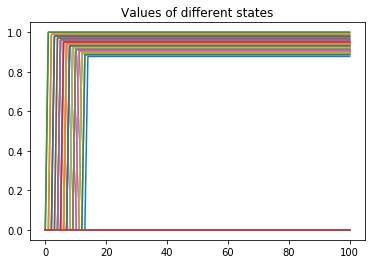

In [257]:
import matplotlib as mpl

for (V, pi) in zip(Vs_PI[:20], pis_PI[:20]):
    plt.figure(figsize=(5,5))
    plt.imshow(V.reshape(8,8), cmap='gray', interpolation='none', clim=(0,1))
    ax = plt.gca()
    
    ax.set_xticks(np.arange(8)-.5)
    ax.set_yticks(np.arange(8)-.5)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    Y, X = np.mgrid[0:8, 0:8]
    
    a2uv = {0: (-1, 0), 1:(0, -1), 2:(1,0), 3:(-1, 0)}
    Pi = pi.reshape(8,8)
    for y in range(8):
        for x in range(8):
            a = Pi[y, x]
            u, v = a2uv[a]
            plt.arrow(x, y,u*.3, -v*.3, color='m', head_width=0.1, head_length=0.1) 
            plt.text(x, y, str(env.unwrapped.desc[y,x].item().decode()),
                     color='g', size=12,  verticalalignment='center',
                     horizontalalignment='center', fontweight='bold')
    plt.grid(color='b', lw=2, ls='-')
    
plt.figure()
plt.plot(Vs_VI)
plt.title("Values of different states");

In [69]:
pis_PI[19].reshape(4,4)

array([[1, 3, 3, 3],
       [0, 0, 3, 0],
       [3, 1, 0, 0],
       [0, 2, 1, 0]])

In [ ]:
prev_state = env.reset()
ret = 0.
done = False
while not done:
    env.render()
    action = np.argmax(q_vals[prev_state])
    state, reward, done, info = env.step(action)
    print(action, state, reward, done, info)
    ret += reward
    prev_state = state
env.render()    

In [258]:
action_size = env.action_space.n
state_size = env.observation_space.n

qtable = np.zeros((state_size, action_size))
print(qtable)

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0

In [259]:
total_episodes = 30000        # Total episodes
learning_rate = 0.3           # Learning rate
max_steps = 100                # Max steps per episode
gamma = 0.999                  # Discounting rate

# Exploration parameters
epsilon = 1                # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability 
decay_rate = 0.0001             # Exponential decay rate for exploration prob

In [260]:
import random
# List of rewards
rewards = []
time_per_step = []
# 2 For life or until learning is stopped
total_start = time.time()
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    start = time.time()
    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)
        
        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])
        
        total_rewards += reward
        
        # Our new state is state
        state = new_state
        
        # If done (if we're dead) : finish episode
        if done == True: 
            break
    end = time.time()
    time_per_step.append(end - start)
    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode) 
    rewards.append(total_rewards)
total_end = time.time()
print(np.mean(time_per_step), "average time per step")
print(total_end - total_start, "total time")
print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

0.000342896652222 average time per step
10.578140020370483 total time
Score over time: 0.4765666666666667
[[ 0.986  0.987  0.987  0.986]
 [ 0.986  0.988  0.988  0.987]
 [ 0.987  0.989  0.989  0.988]
 [ 0.988  0.99   0.99   0.989]
 [ 0.989  0.991  0.991  0.99 ]
 [ 0.99   0.992  0.992  0.991]
 [ 0.991  0.993  0.993  0.992]
 [ 0.992  0.994  0.993  0.993]
 [ 0.987  0.988  0.988  0.986]
 [ 0.987  0.989  0.989  0.987]
 [ 0.988  0.99   0.99   0.988]
 [ 0.989  0.     0.991  0.989]
 [ 0.99   0.992  0.992  0.99 ]
 [ 0.991  0.993  0.993  0.991]
 [ 0.992  0.994  0.994  0.992]
 [ 0.993  0.995  0.994  0.993]
 [ 0.988  0.989  0.989  0.987]
 [ 0.988  0.99   0.99   0.988]
 [ 0.989  0.991  0.     0.989]
 [ 0.     0.     0.     0.   ]
 [ 0.     0.993  0.993  0.991]
 [ 0.992  0.     0.994  0.992]
 [ 0.993  0.995  0.995  0.993]
 [ 0.994  0.996  0.995  0.994]
 [ 0.989  0.988  0.99   0.988]
 [ 0.989  0.989  0.991  0.989]
 [ 0.99   0.99   0.992  0.99 ]
 [ 0.991  0.     0.993  0.   ]
 [ 0.992  0.994  0.     0.

In [261]:
from PIL import Image
from io import StringIO

env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(100):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state,:])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            # We print the number of step it took.
            print("Number of steps", step)
            break
        state = new_state
env.close()

****************************************************
EPISODE  0
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 13
****************************************************
EPISODE  1
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 13
****************************************************
EPISODE  2
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 13
****************************************************
EPISODE  3
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 13
****************************************************
EPISODE  4
  (Down)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Number of steps 13


In [262]:
value_per_state = np.max(qtable, axis=1)
policy_per_state = np.argmax(qtable, axis=1)

<Figure size 432x288 with 0 Axes>

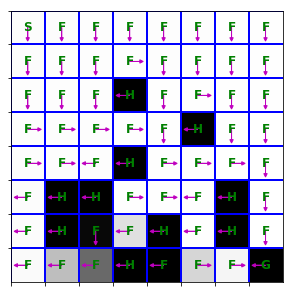

<Figure size 432x288 with 0 Axes>

In [263]:
plt.figure(figsize=(5,5))
plt.imshow(value_per_state.reshape(8,8), cmap='gray', interpolation='none', clim=(0,1))
ax = plt.gca()

ax.set_xticks(np.arange(8)-.5)
ax.set_yticks(np.arange(8)-.5)
ax.set_xticklabels([])
ax.set_yticklabels([])
Y, X = np.mgrid[0:8, 0:8]

# img = plt.imshow(np.array([[0,1]]), cmap="gray")
# img.set_visible(False)

# plt.colorbar(orientation="vertical")

# ax.plot(2,2)

a2uv = {0: (-1, 0), 1:(0, -1), 2:(1,0), 3:(-1, 0)}
Pi = policy_per_state.reshape(8,8)
for y in range(8):
    for x in range(8):
        a = Pi[y, x]
        u, v = a2uv[a]
        plt.arrow(x, y,u*.3, -v*.3, color='m', head_width=0.1, head_length=0.1) 
        plt.text(x, y, str(env.unwrapped.desc[y,x].item().decode()),
                 color='g', size=12,  verticalalignment='center',
                 horizontalalignment='center', fontweight='bold')
plt.grid(color='b', lw=2, ls='-')
    
plt.figure()

In [123]:
len(Vs_VI)

21

In [134]:
len(rewards)

15000